### Run basic `scanpy` QC and doublet detection with `scrublet` for COPD Influenza Versuch 5 group

- **Developed by**: Carlos Talavera-López PhD
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- v230314

### Load required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
h5py                3.8.0
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.7.0
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.4
numexpr             2.8.4
numpy               1.23.5
packaging           23.0
pandas              1.5.3
parso               0.8.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.0.0
prompt_toolkit      3.0.

In [3]:
save_path = '../data/'

### Read individual `anndata` objects and predict doublets per sample

In [4]:
adata_1 = sc.read_h5ad('../data/Versuch_5_grch38-iav_CHE03_CTRL_GEX.h5ad')
adata_1

AnnData object with n_obs × n_vars = 5238 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody'

In [5]:
sc.pp.filter_cells(adata_1, min_genes = 200)
print(adata_1.n_obs, adata_1.n_vars)

5238 31449


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 20.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.0%
Elapsed time: 7.9 seconds


22

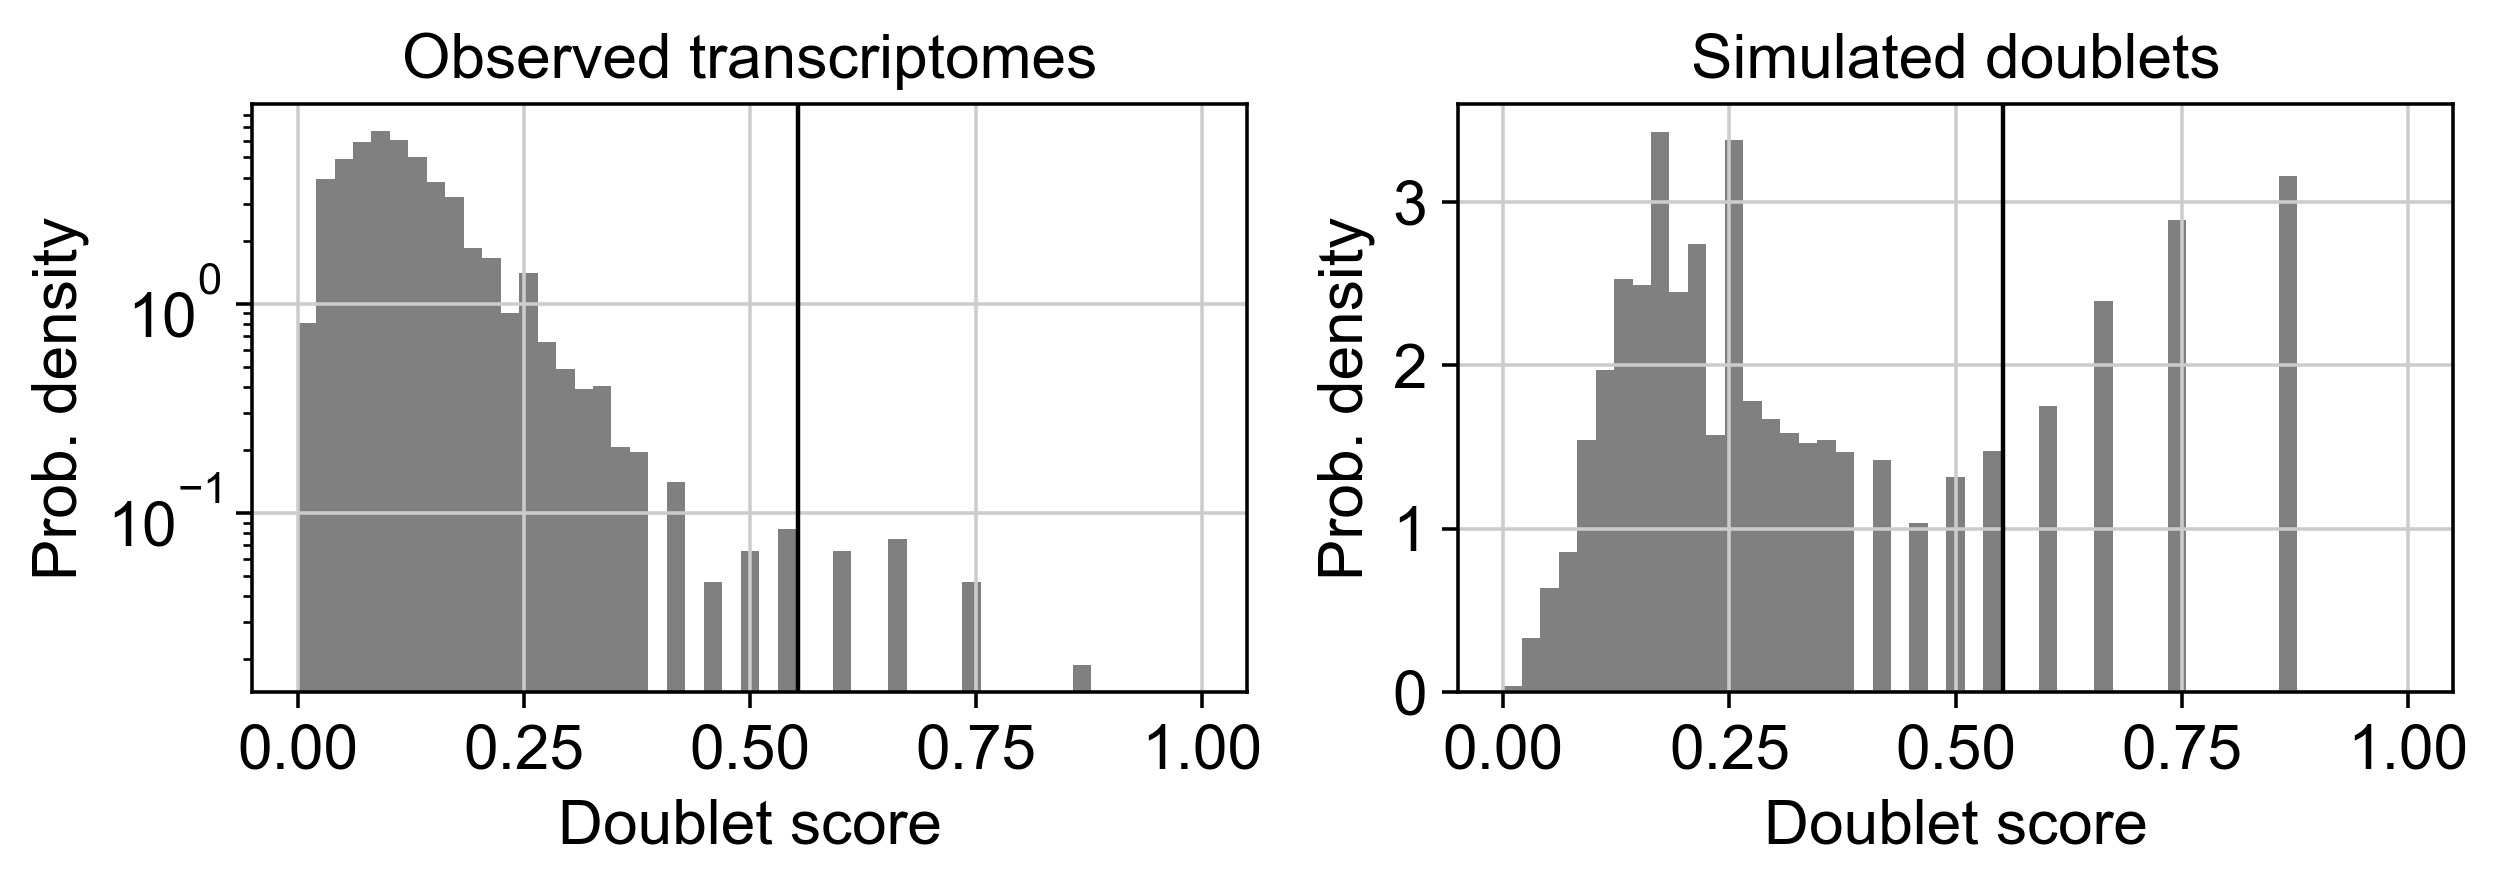

In [6]:
scrub = scr.Scrublet(adata_1.X)
adata_1.obs['doublet_scores'], adata_1.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata_1.obs['predicted_doublets'])

In [7]:
adata_2 = sc.read_h5ad('../data/Versuch_5_grch38-iav_CHE03_IAV_GEX.h5ad')
adata_2

AnnData object with n_obs × n_vars = 4119 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody'

In [8]:
sc.pp.filter_cells(adata_2, min_genes = 200)
print(adata_2.n_obs, adata_2.n_vars)

4119 31449


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 17.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.2%
Elapsed time: 5.5 seconds


16

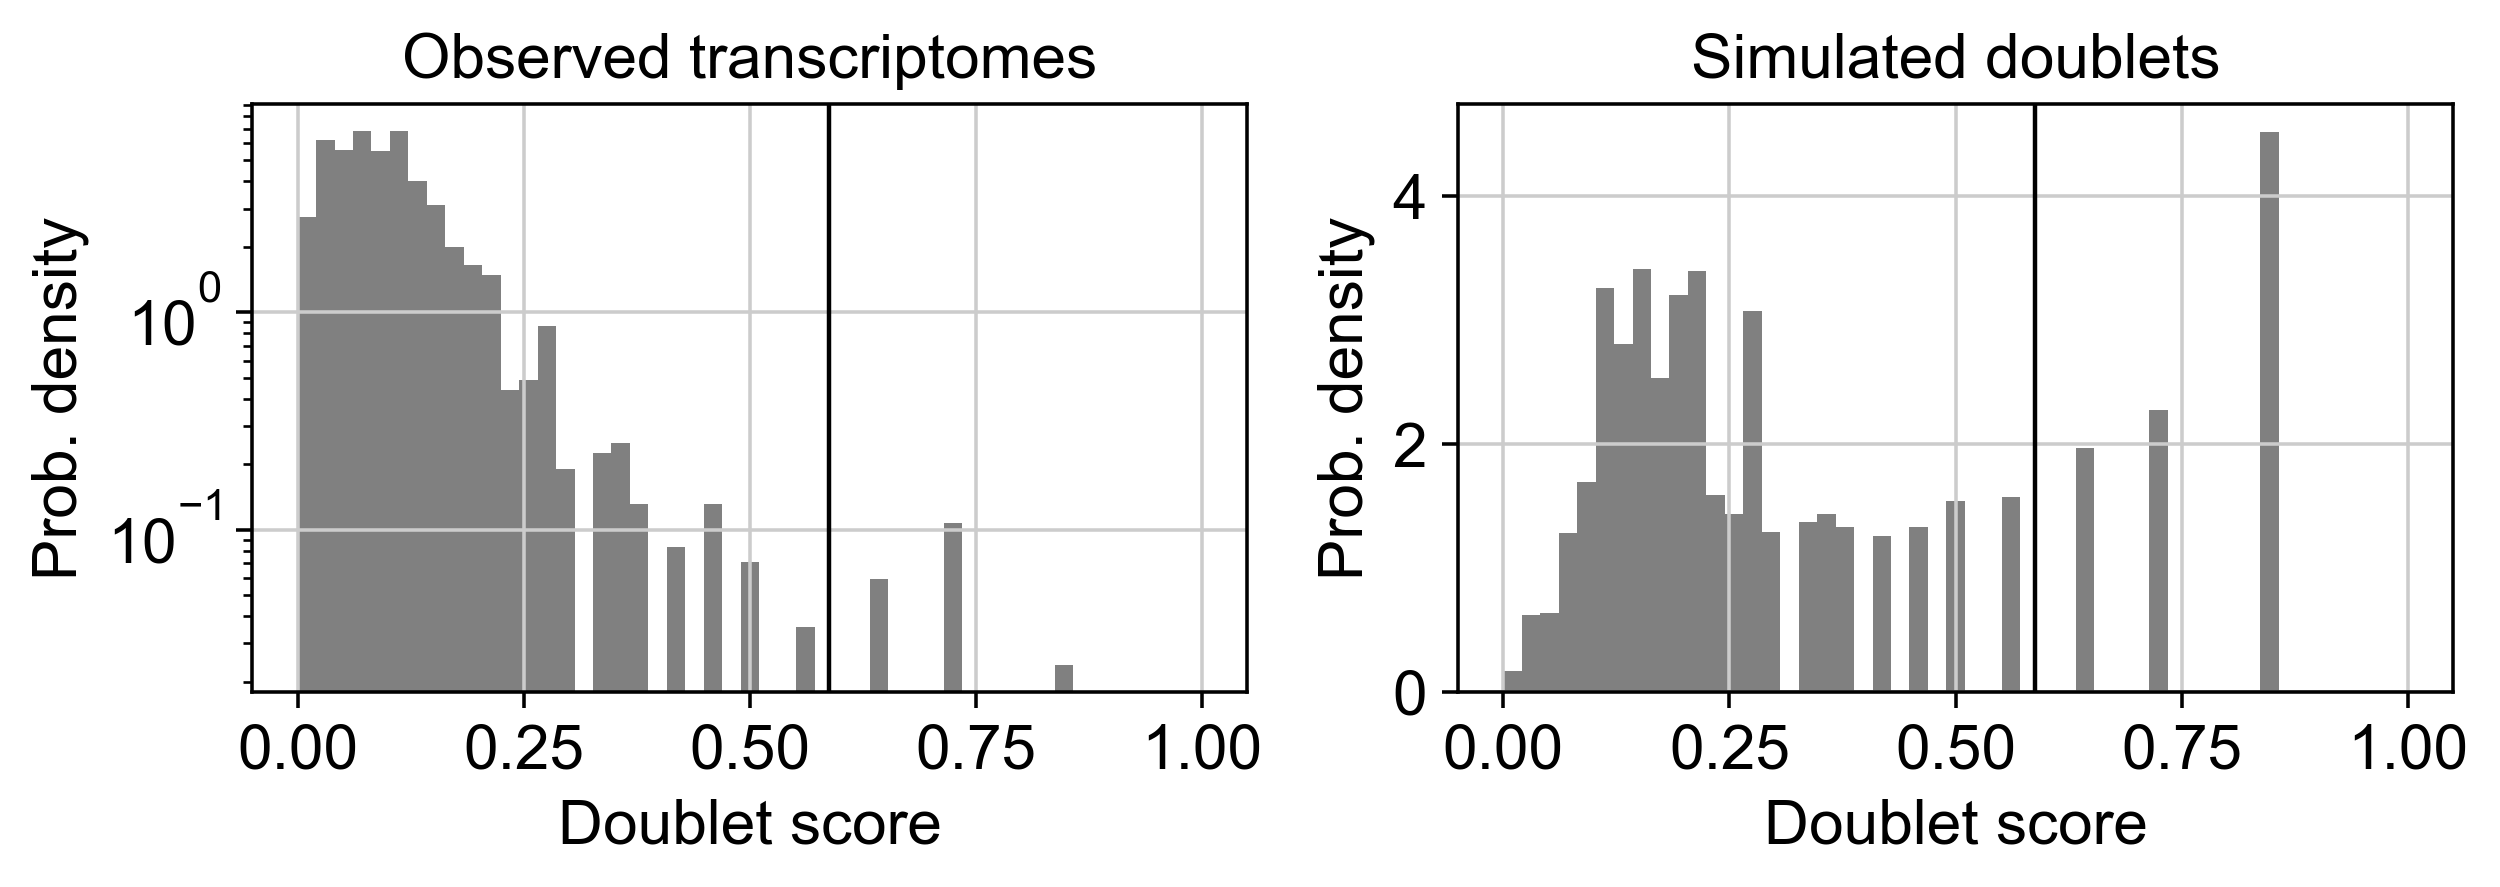

In [9]:
scrub = scr.Scrublet(adata_2.X)
adata_2.obs['doublet_scores'], adata_2.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata_2.obs['predicted_doublets'])

In [10]:
adata_3 = sc.read_h5ad('../data/Versuch_5_grch38-iav_GER12_CTRL_GEX.h5ad')
adata_3

AnnData object with n_obs × n_vars = 4739 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody'

In [11]:
sc.pp.filter_cells(adata_3, min_genes = 200)
print(adata_3.n_obs, adata_3.n_vars)

4739 31449


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 31.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 2.5%
Elapsed time: 7.6 seconds


37

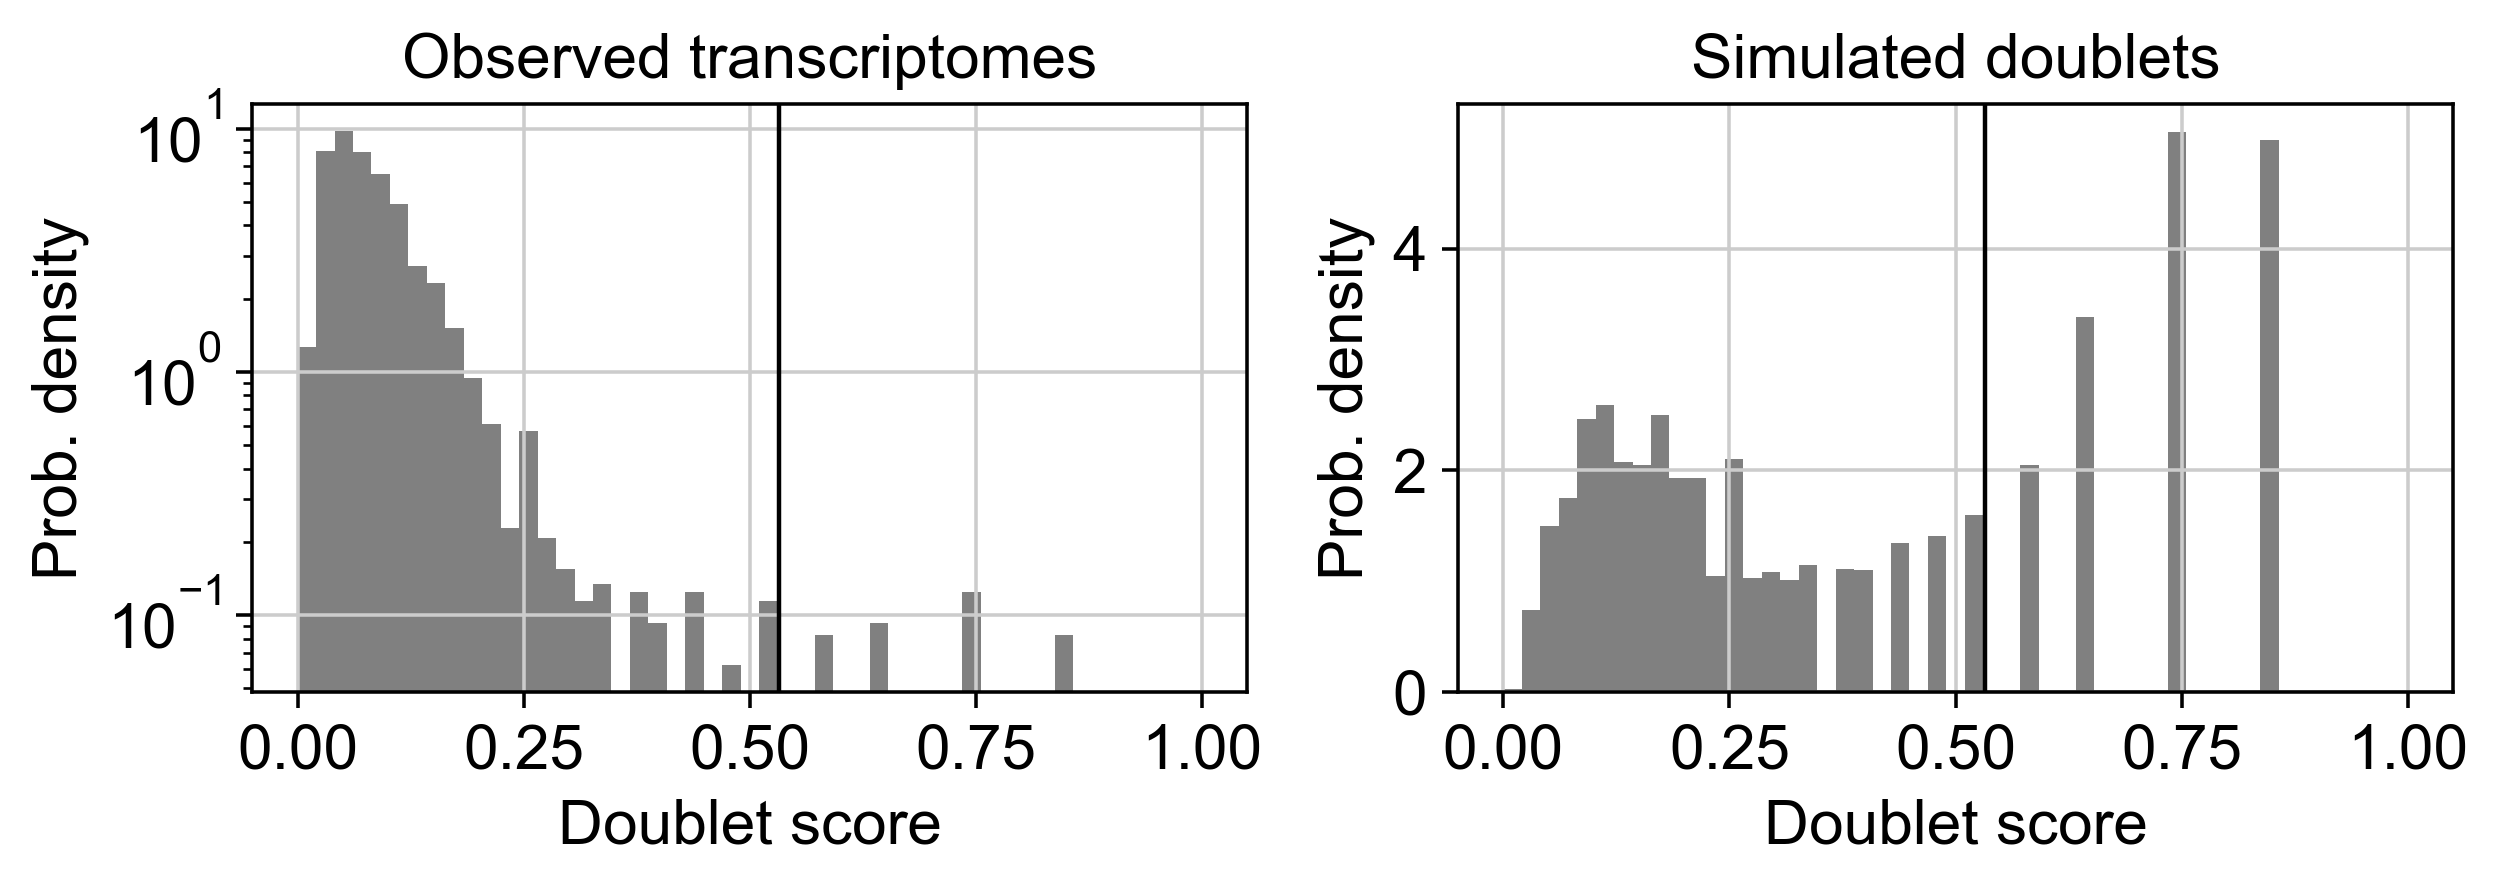

In [12]:
scrub = scr.Scrublet(adata_3.X)
adata_3.obs['doublet_scores'], adata_3.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata_3.obs['predicted_doublets'])

In [13]:
adata_4 = sc.read_h5ad('../data/Versuch_5_grch38-iav_GER12_IAV_GEX.h5ad')
adata_4

AnnData object with n_obs × n_vars = 4395 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody'

In [14]:
sc.pp.filter_cells(adata_4, min_genes = 200)
print(adata_4.n_obs, adata_4.n_vars)

4395 31449


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 36.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.8%
Elapsed time: 6.3 seconds


60

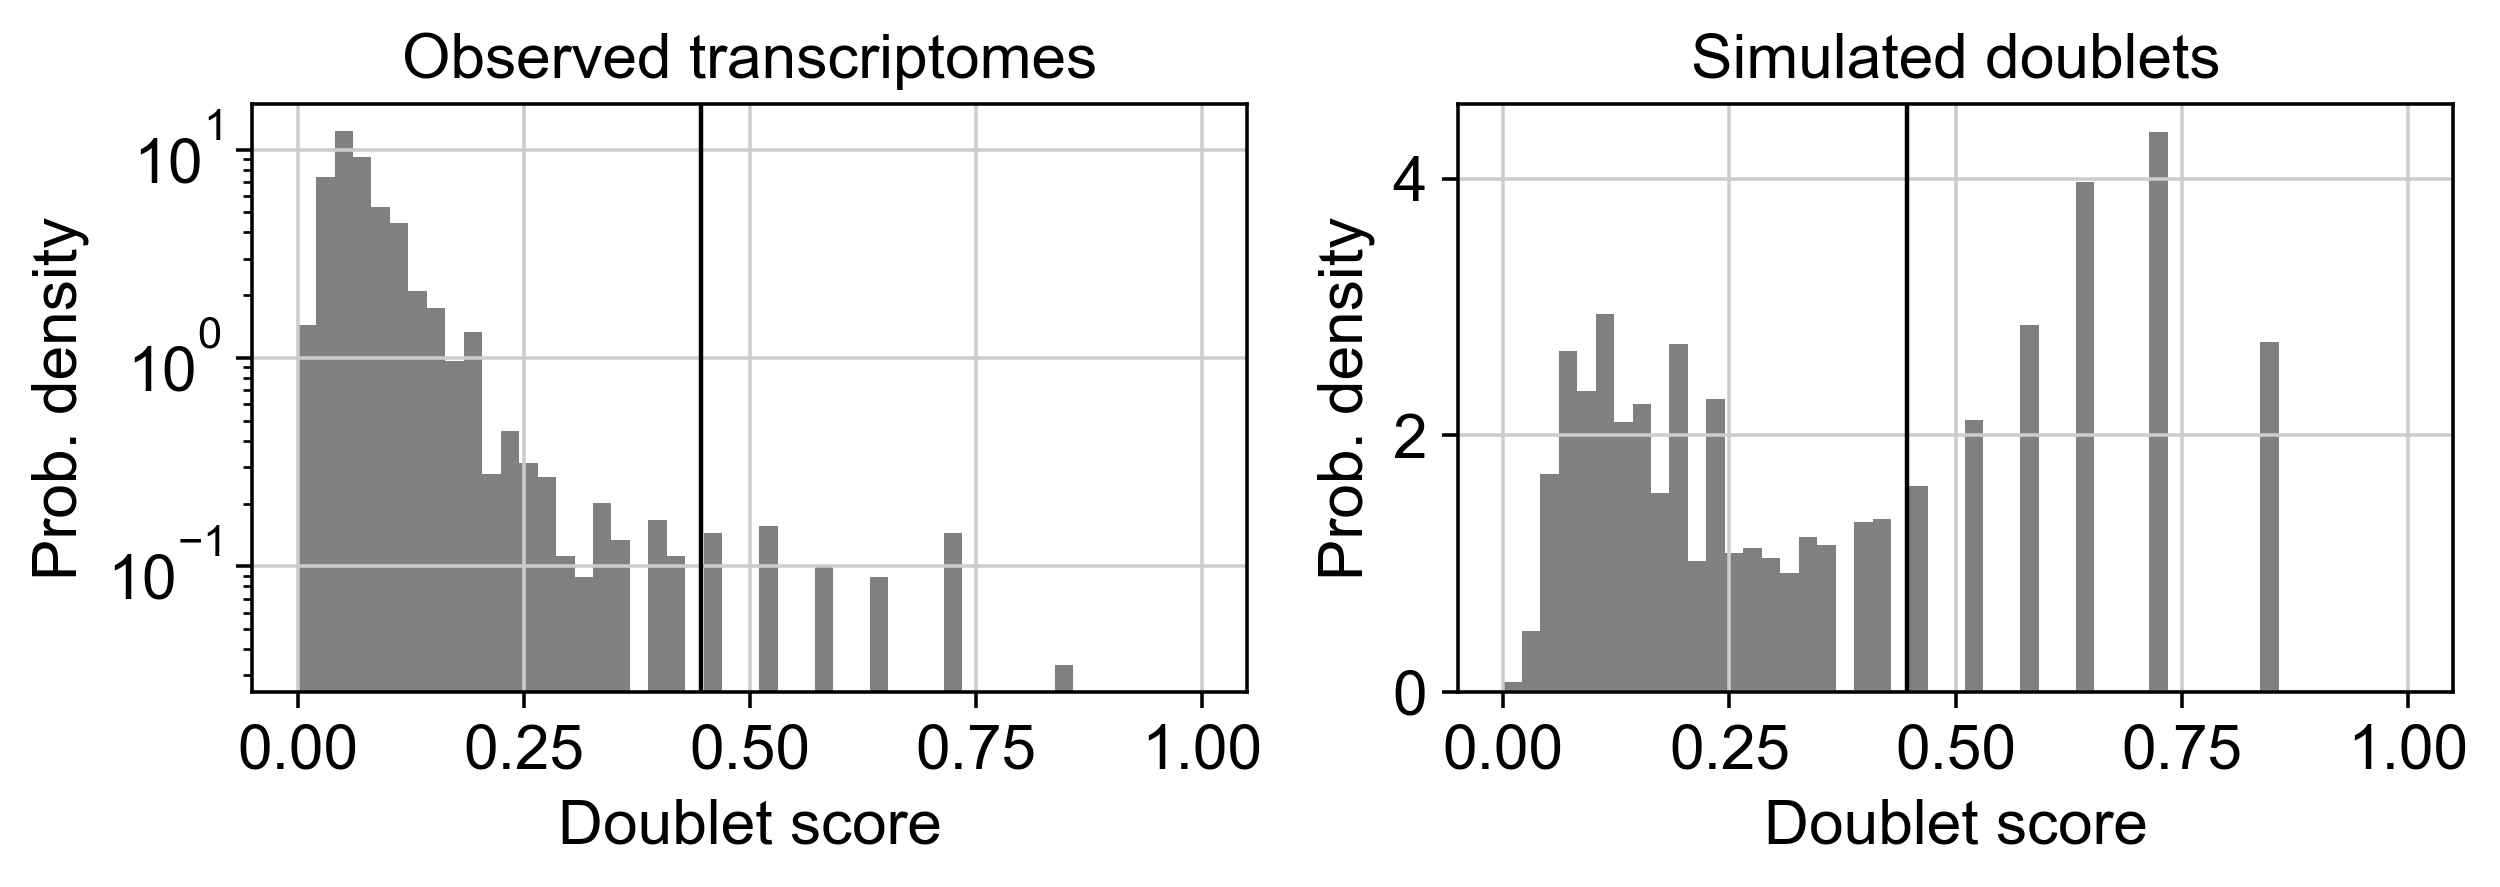

In [15]:
scrub = scr.Scrublet(adata_4.X)
adata_4.obs['doublet_scores'], adata_4.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata_4.obs['predicted_doublets'])

### Merge individual objects

In [16]:
adata = adata_1.concatenate(adata_2, adata_3, adata_4, batch_key = 'batch', batch_categories = ['CHE03_CTRL', 'CHE03_IAV', 'GER12_CTRL', 'GER12_IAV'], join = 'inner')
adata

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float6

AnnData object with n_obs × n_vars = 18491 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch'

In [17]:
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 18491 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch'

In [18]:
sample_object.shape

(18491, 31449)

### Compute QC stats

In [19]:
sample_object.shape

(18491, 31449)

In [20]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-') 
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var

mt   ribo
A1BG      False  False
A1BG-AS1  False  False
A1CF      False  False
A2M       False  False
A2M-AS1   False  False
...         ...    ...
ZXDC      False  False
ZYG11A    False  False
ZYG11B    False  False
ZYX       False  False
ZZEF1     False  False

[31449 rows x 2 columns]

In [21]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)

In [22]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1) / np.sum(sample_object.X, axis = 1)
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1)

In [23]:
sample_object

AnnData object with n_obs × n_vars = 18491 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### Visualise QC covariates

In [24]:
sample_object.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2ML1-AS2', 'A3GALT2', 'A4GALT',
       ...
       'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B',
       'ZYX', 'ZZEF1'],
      dtype='object', length=31449)

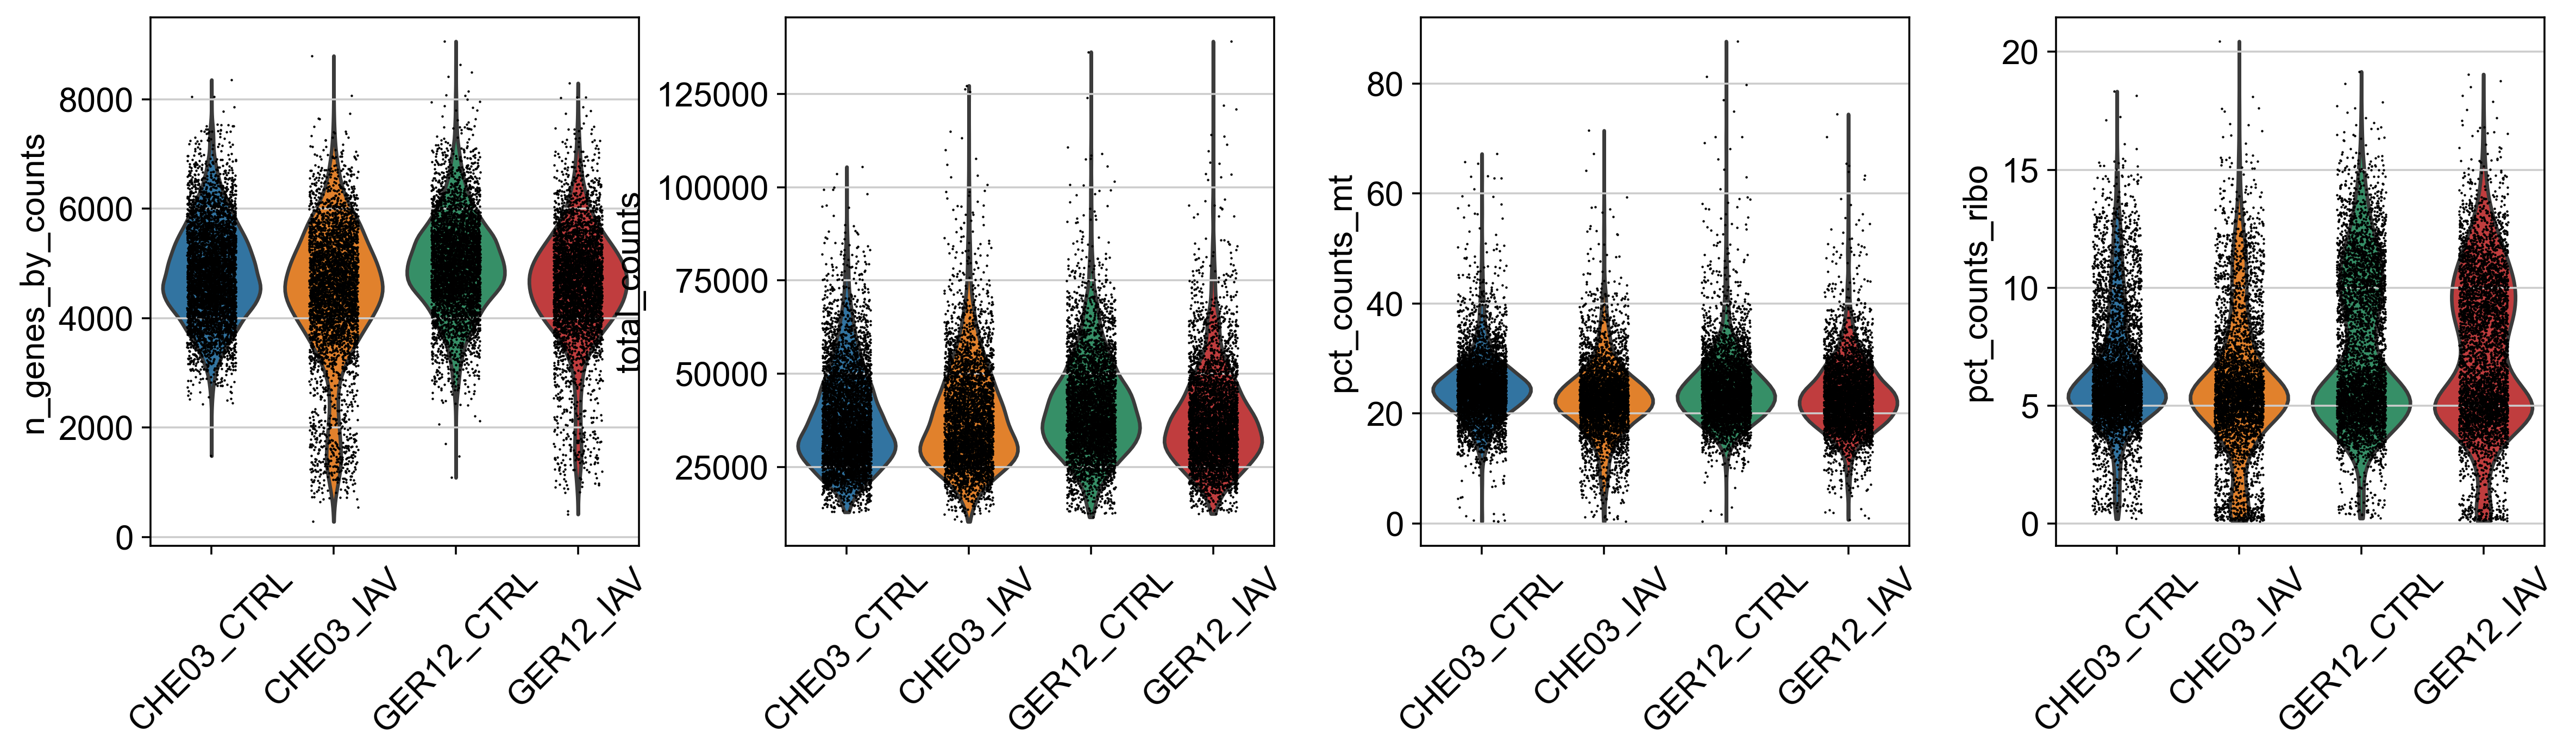

In [25]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter = 0.2, groupby = 'batch', rotation = 45)

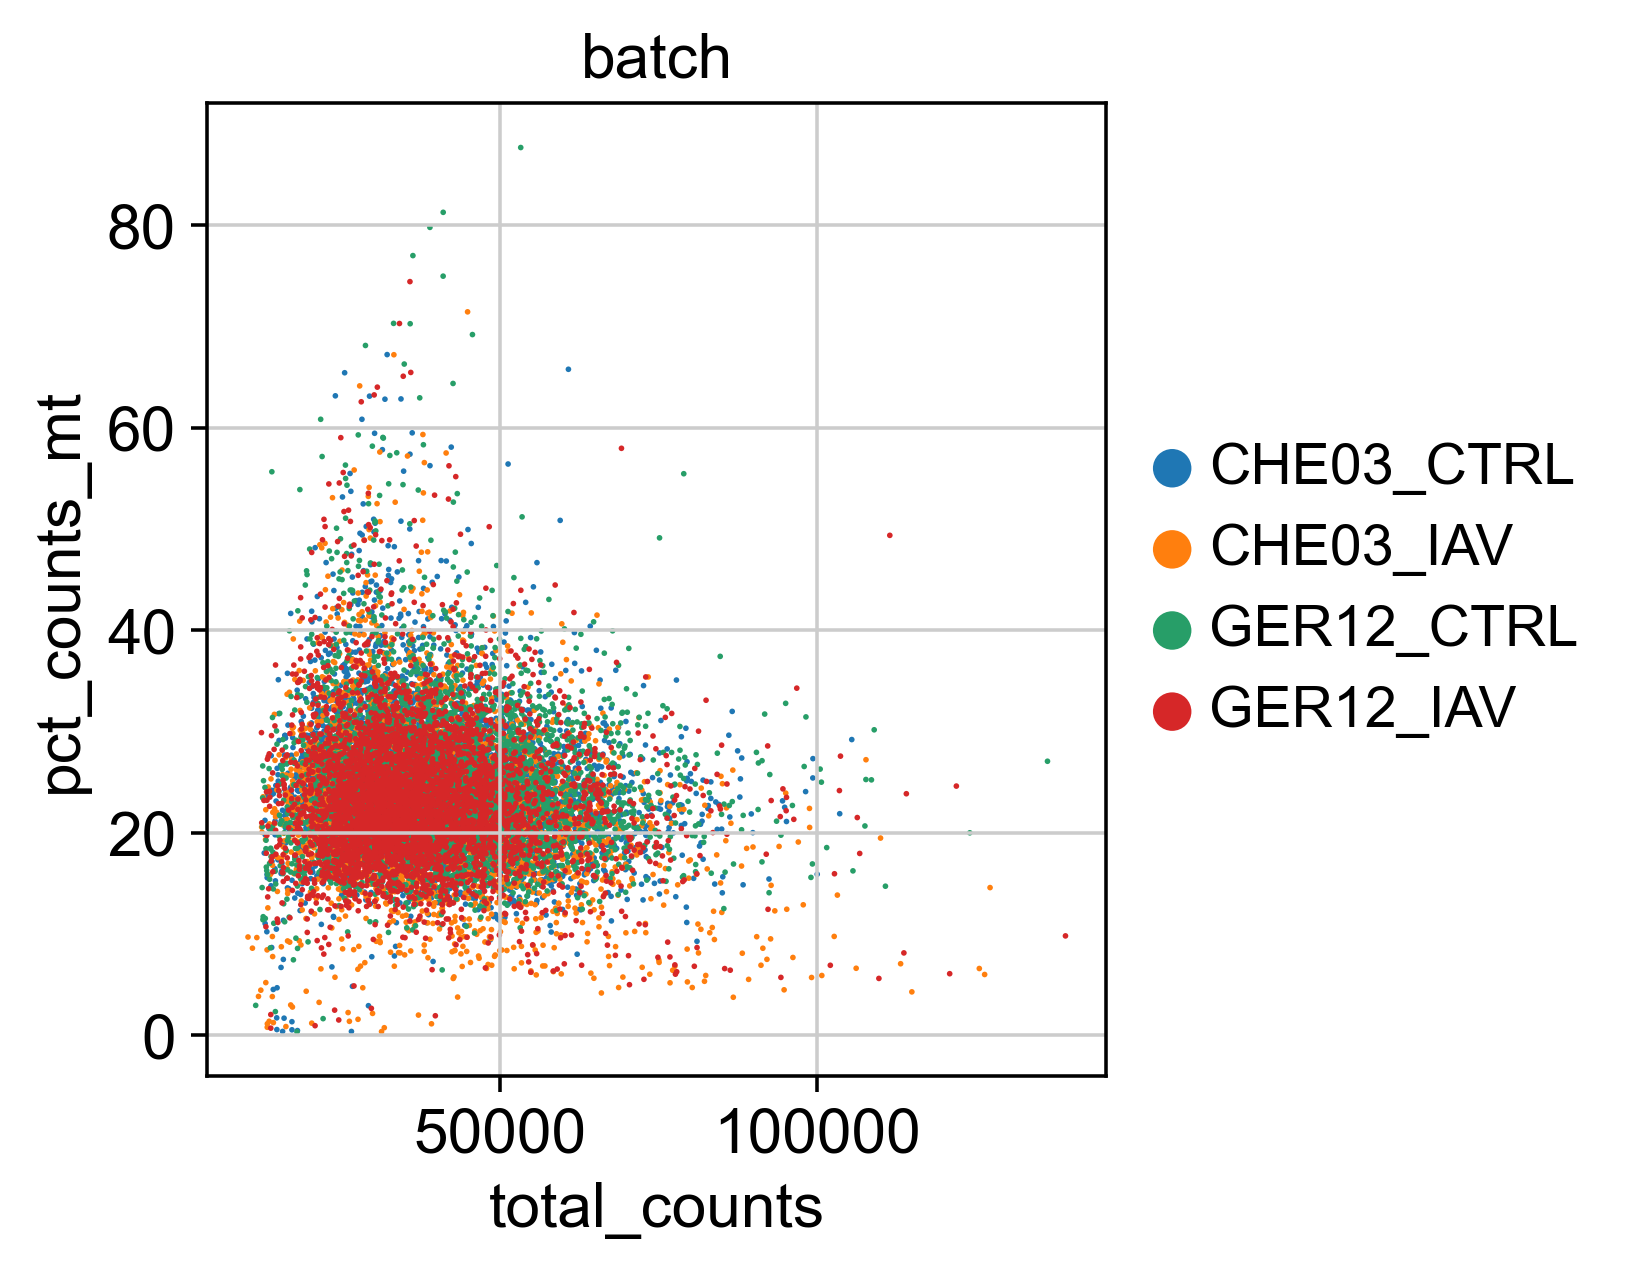

In [26]:
sc.pl.scatter(sample_object, x = 'total_counts', y = 'pct_counts_mt', color = "batch")

### Add sample sex covariate

In [27]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [28]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

In [29]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['AMELY', 'BPY2C', 'CDY2A', 'DAZ1', 'DAZ2', 'DAZ3', 'DAZ4', 'DDX3Y',
       'EIF1AY', 'FAM197Y5', 'FAM224B', 'FAM41AY1', 'HSFY1', 'HSFY2', 'KDM5D',
       'LINC00278', 'LINC00279', 'NLGN4Y', 'NLGN4Y-AS1', 'PCDH11Y', 'PRORY',
       'PRY', 'PRY2', 'RPS4Y1', 'RPS4Y2', 'SRY', 'TBL1Y', 'TGIF2LY', 'TMSB4Y',
       'TTTY1', 'TTTY10', 'TTTY11', 'TTTY12', 'TTTY13', 'TTTY14', 'TTTY19',
       'TTTY1B', 'TTTY20', 'TTTY22', 'TTTY23', 'TTTY4', 'TTTY4B', 'TTTY4C',
       'TTTY5', 'USP9Y', 'UTY', 'ZFY', 'ZFY-AS1'],
      dtype='object')

In [30]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1) / np.sum(sample_object.X, axis = 1) * 100

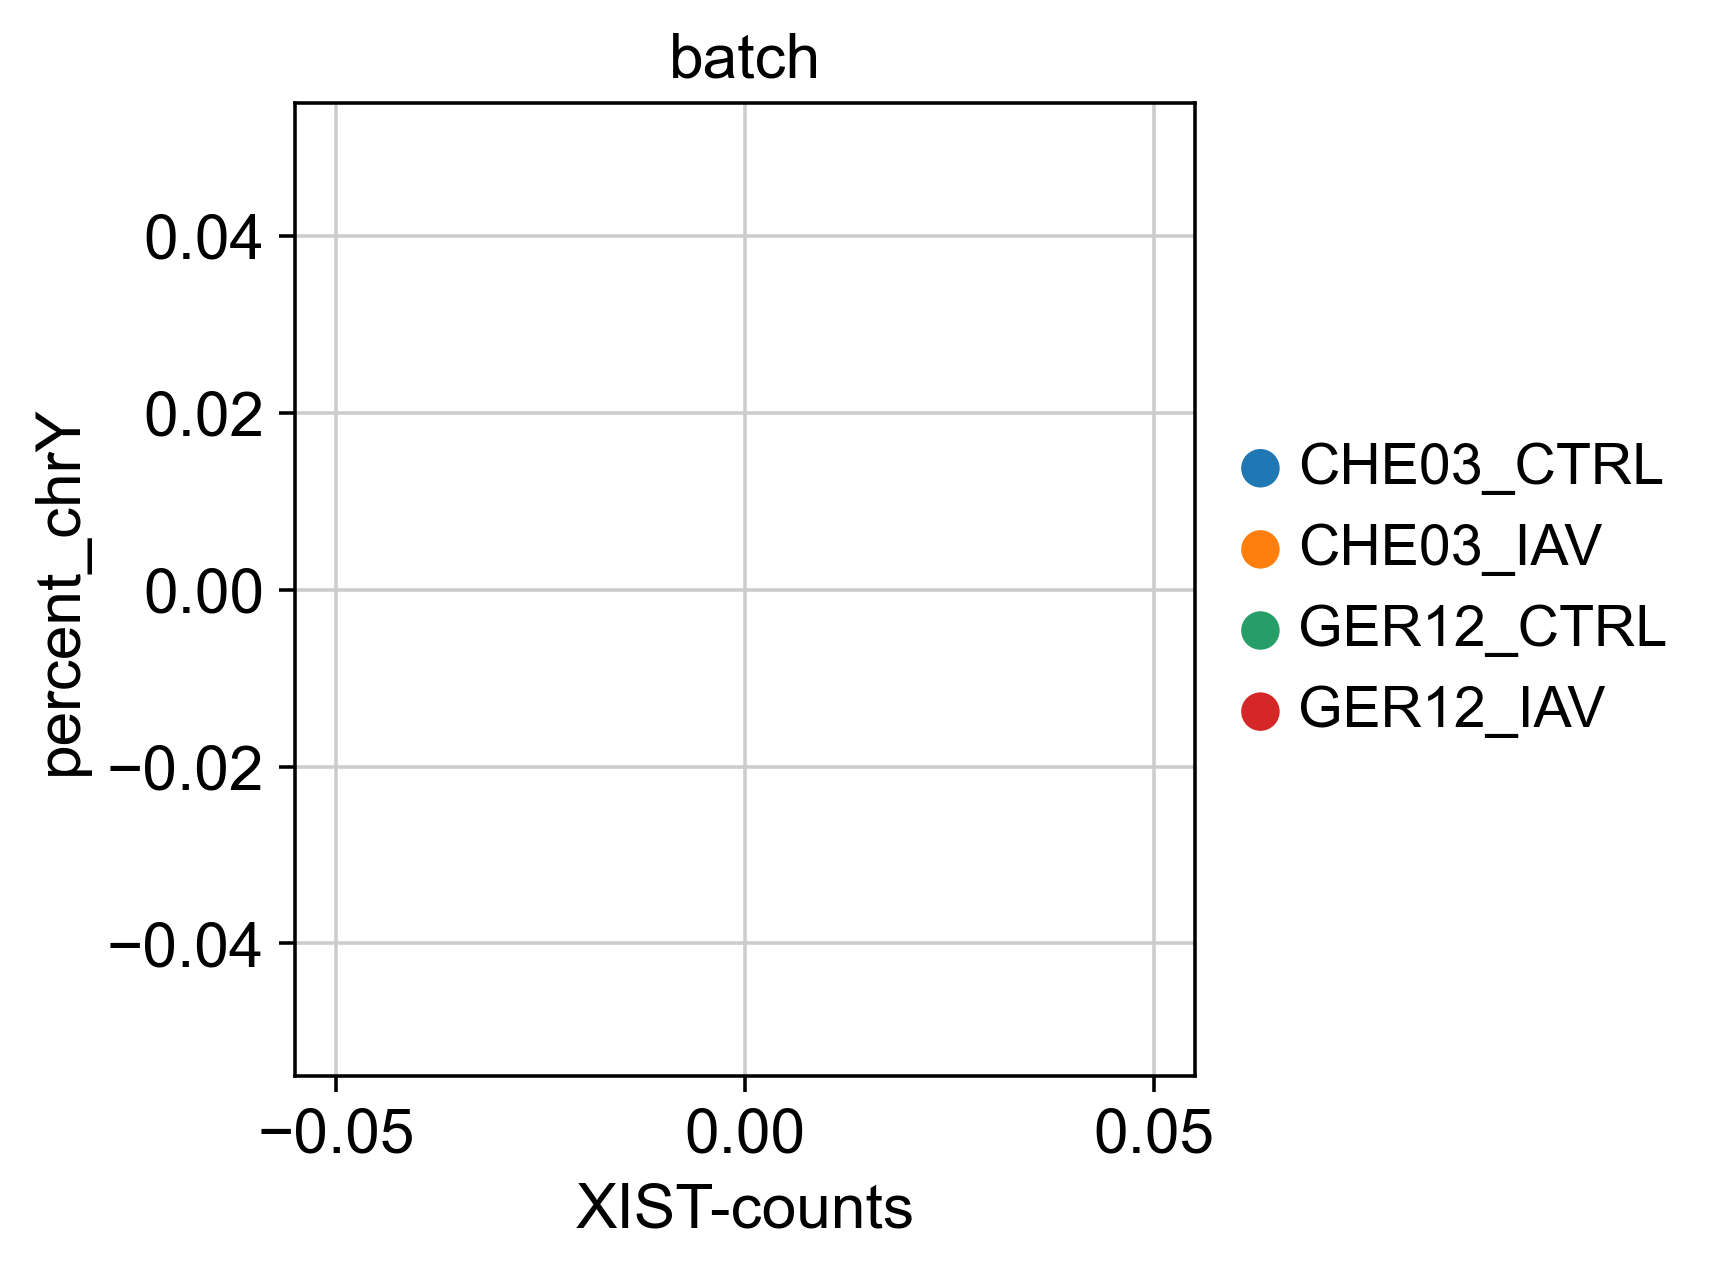

In [31]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')]

sc.pl.scatter(sample_object, x = 'XIST-counts', y = 'percent_chrY', color = "batch")

### Calculate cell cycle scores

In [32]:
!if [ ! -f /Users/cartalop/github/COPD_influenza/data/regev_lab_cell_cycle_genes.txt ]; then curl -o /Users/cartalop/github/COPD_influenza/data/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [33]:
cell_cycle_genes = [x.strip() for x in open('/Users/cartalop/github/COPD_influenza/data/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [34]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

/var/folders/rx/f17v355x1xqdpm4hlmym_zvw0000gn/T/ipykernel_22669/4265207469.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)


normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['BPIFA1', 'MT-ATP6', 'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND1', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'MT-ND5', 'MTRNR2L12', 'MTRNR2L8', 'NC_026431.1', 'NC_026432.1', 'NC_026433.1', 'NC_026434.1', 'NC_026435.1', 'NC_026436.1', 'NC_026437.1', 'NC_026438.1', 'SAA1', 'SCGB1A1', 'SCGB3A1', 'SLPI']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'


/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'S_score', score of gene set (adata.obs).
    473 total control genes are used. (0:00:03)
computing score 'G2M_score'


/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    470 total control genes are used. (0:00:03)
-->     'phase', cell cycle phase (adata.obs)


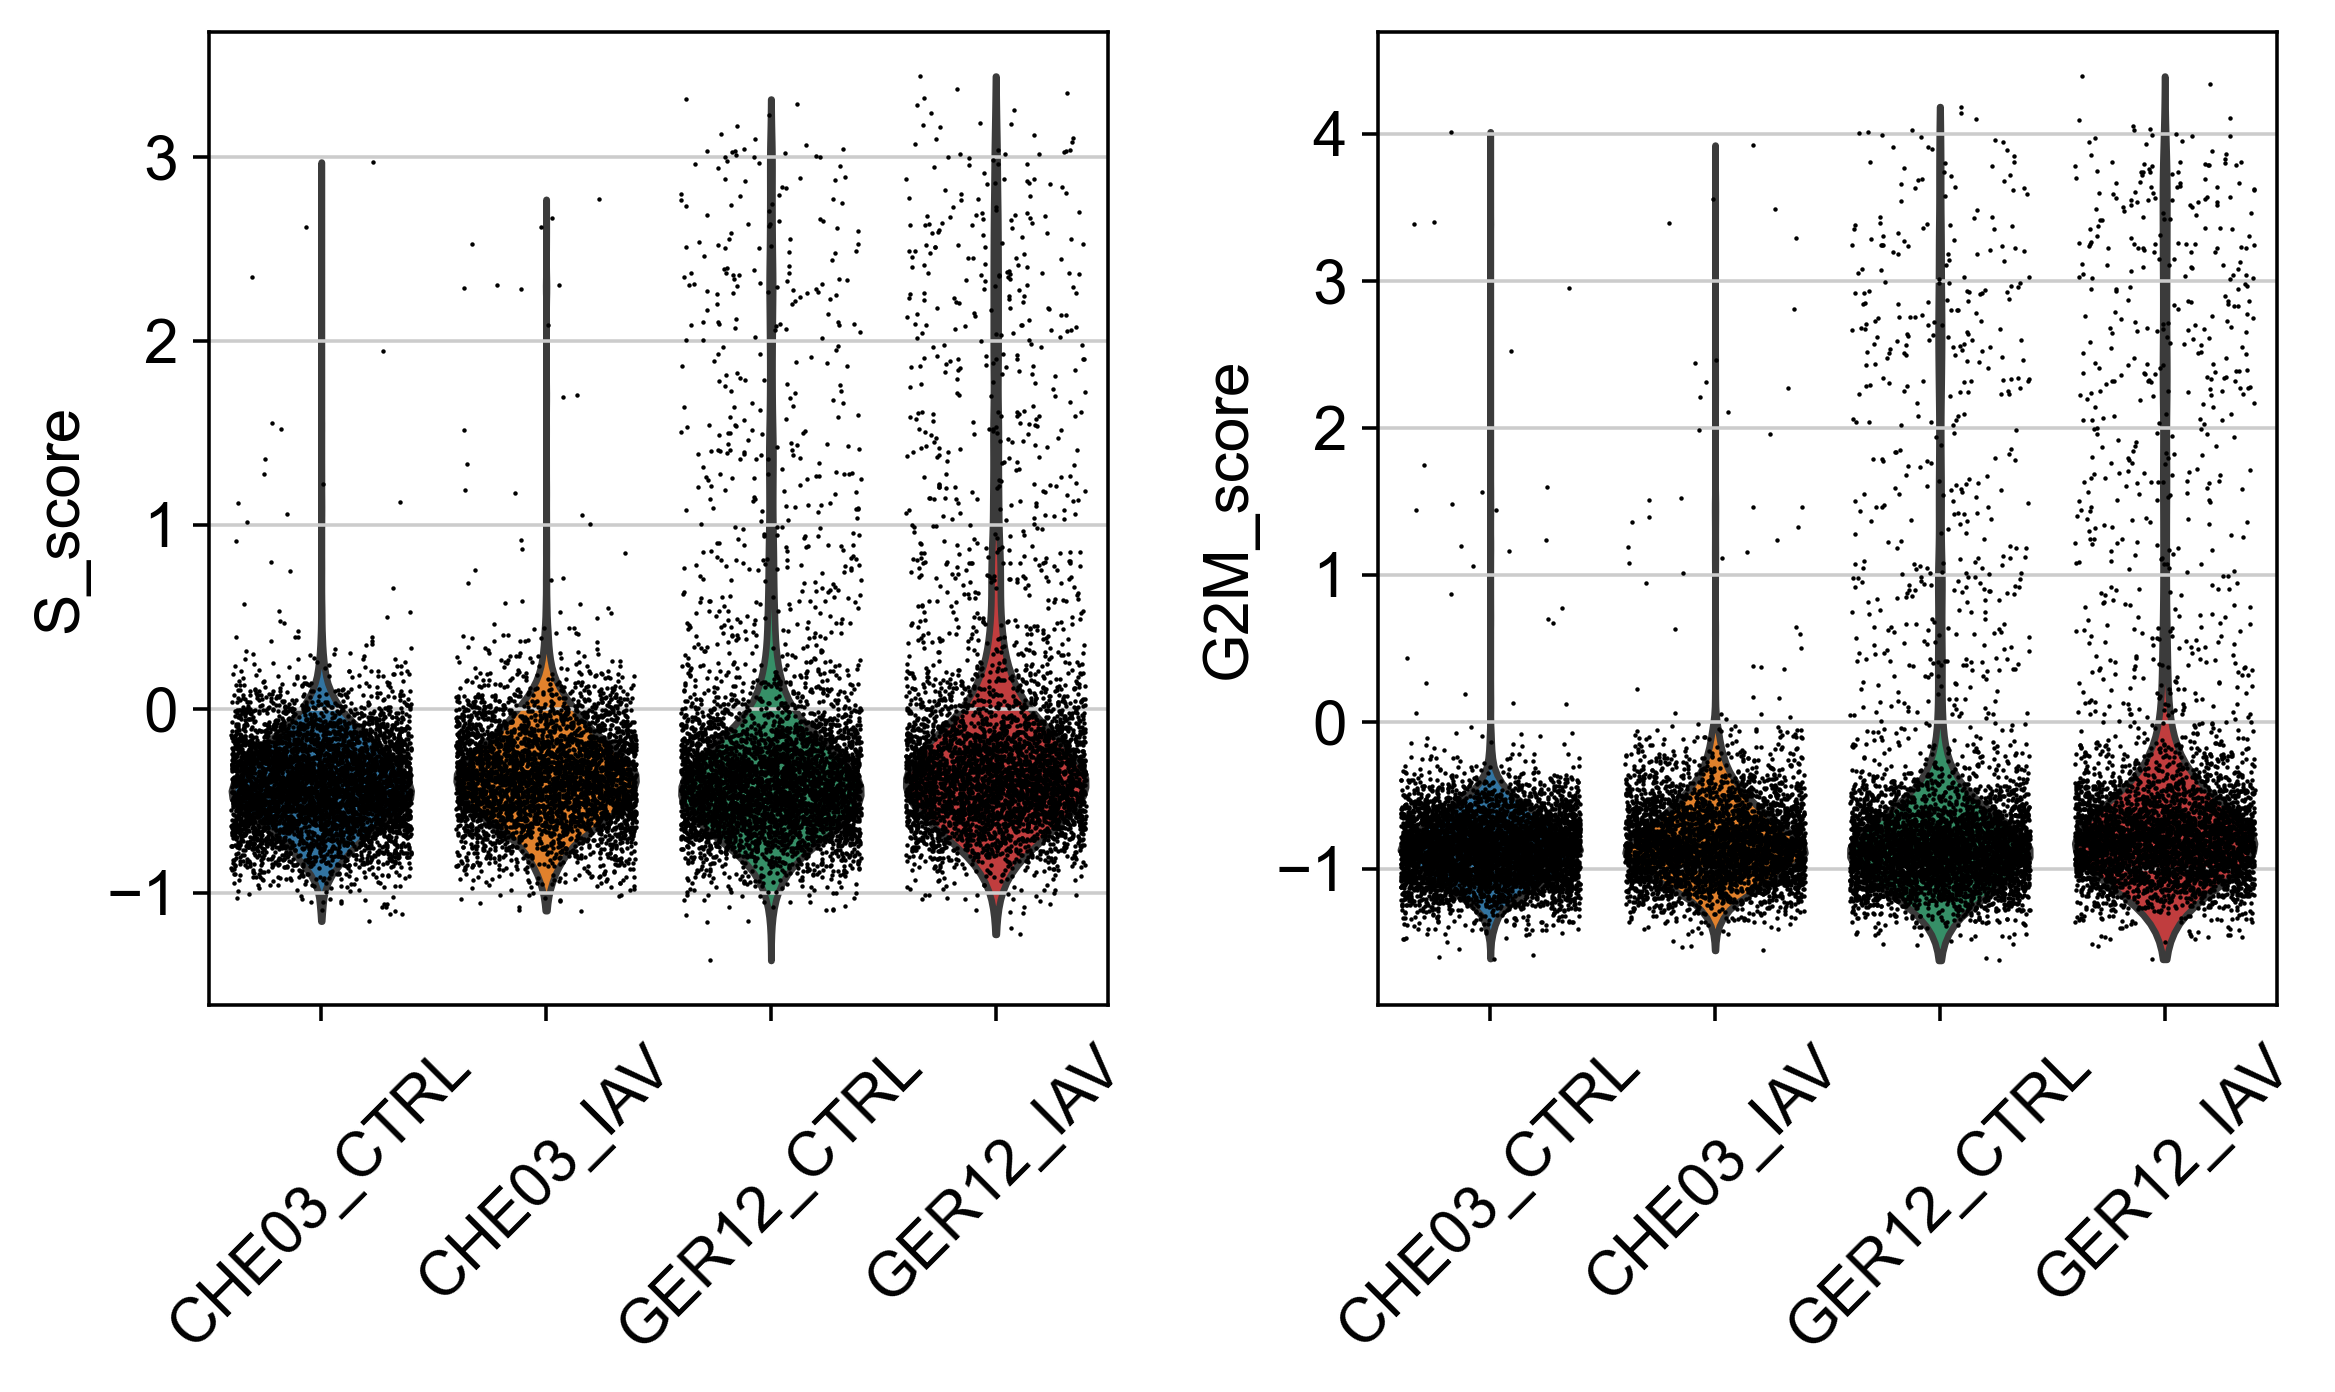

In [35]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'batch', rotation = 45)

### Calculate IAV score

In [ ]:
nc_genes = adata_log.var_names[adata_log.var_names.str.startswith('NC_')]
sc.tl.score_genes(adata_log, nc_genes, score_name = 'IAV_score')

In [36]:
sample_object.obs['IAV_score'] = adata_log.obs['IAV_score']
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 18491 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'

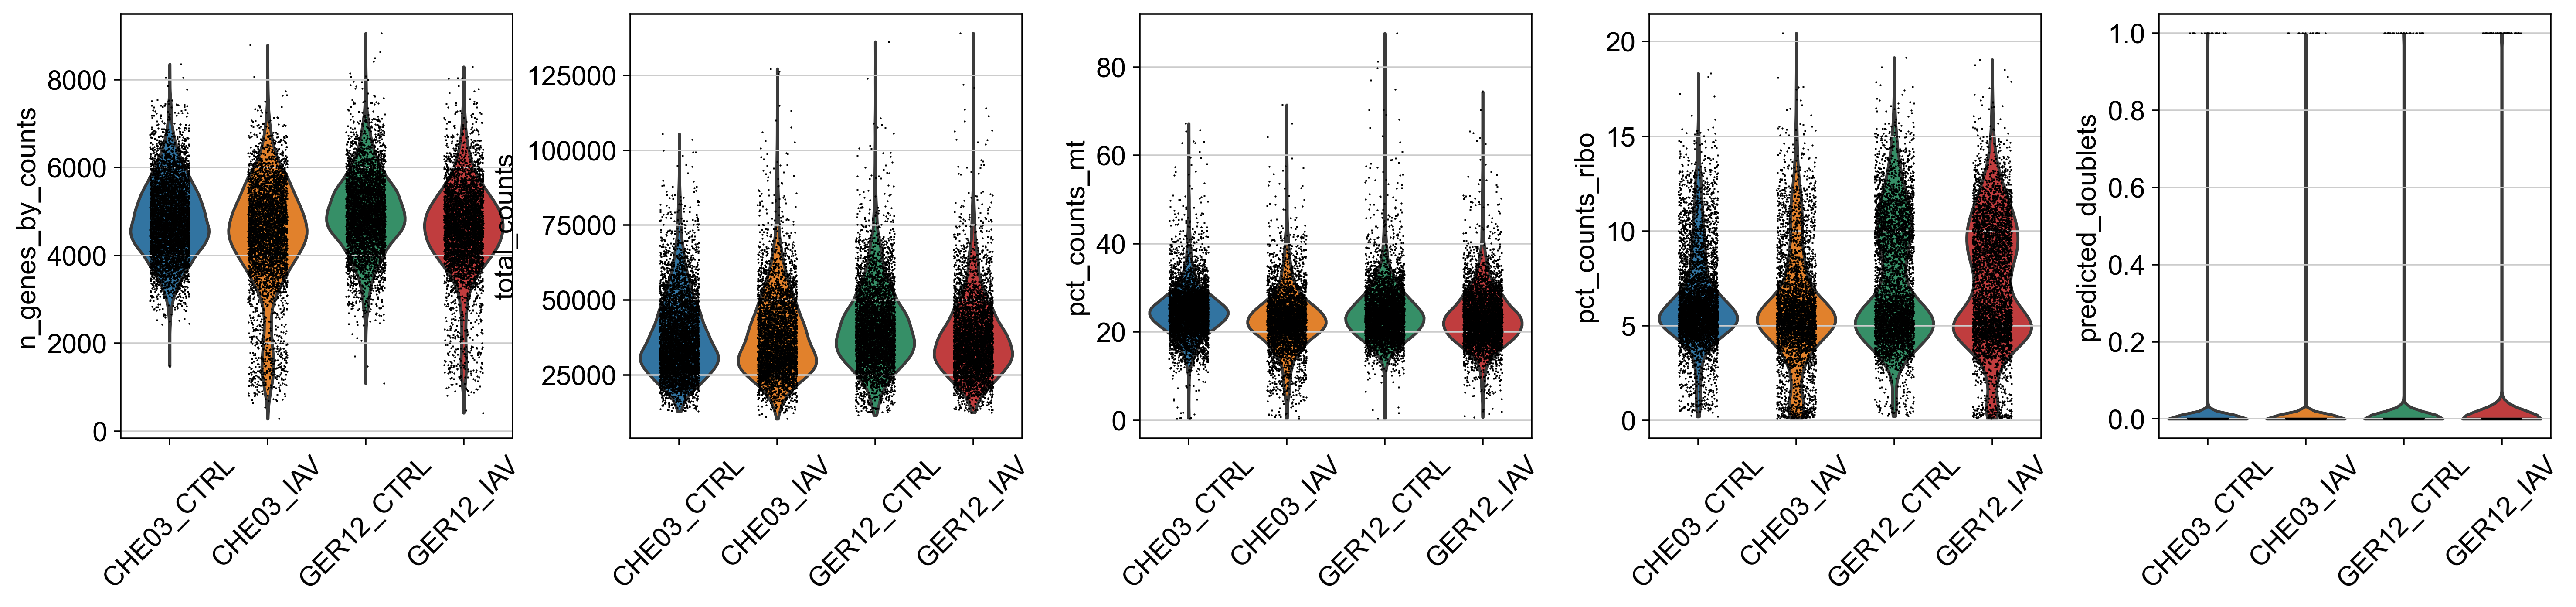

In [37]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'batch', rotation = 45)

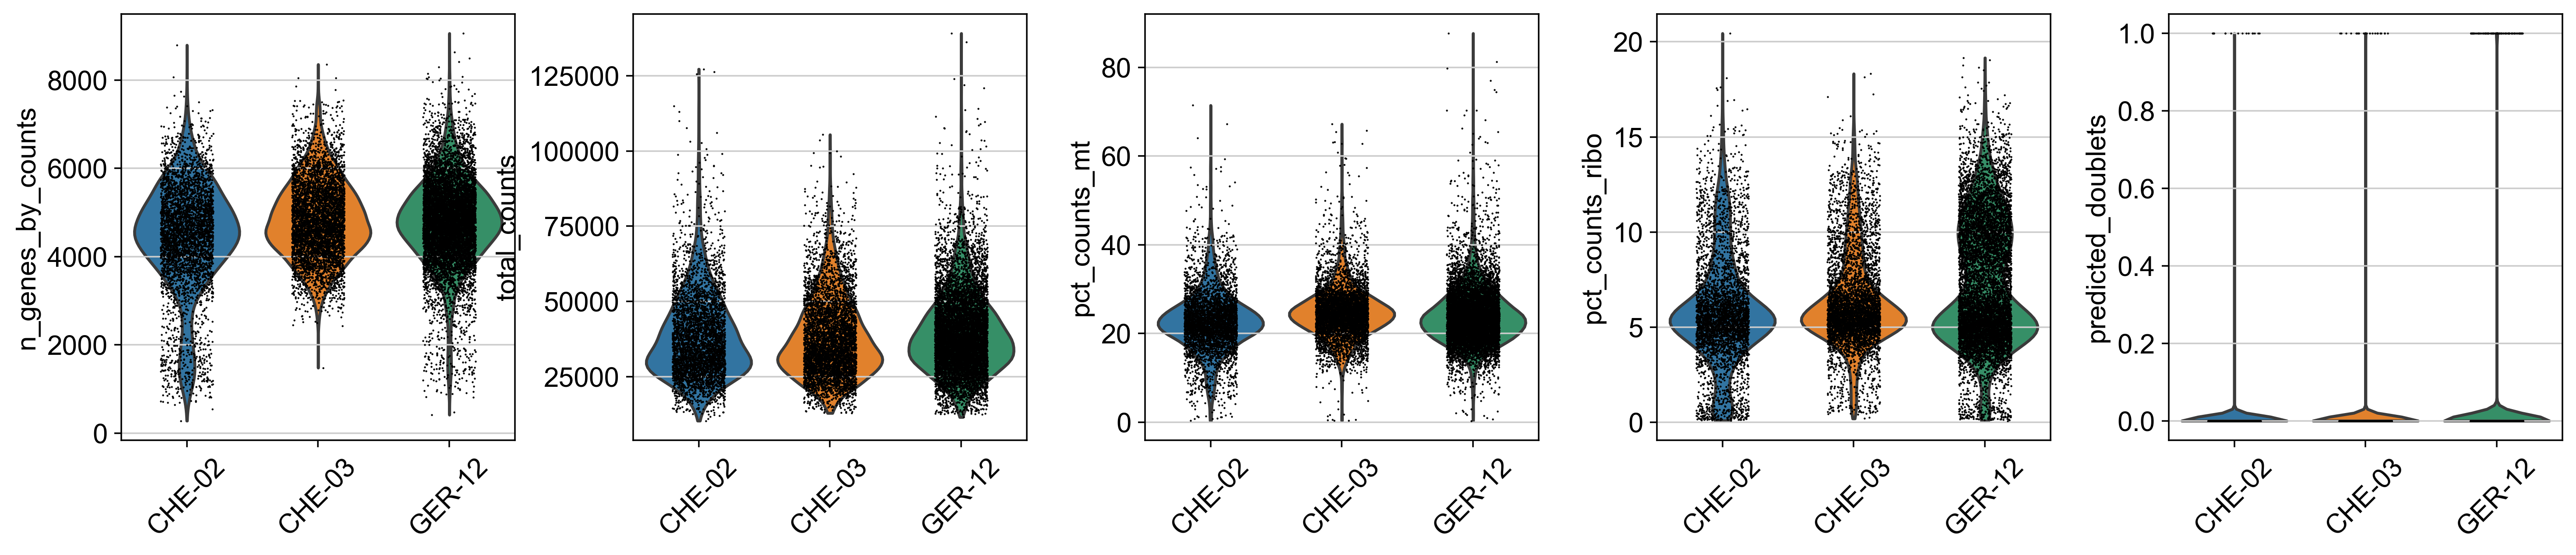

In [38]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

### Prepare counts for individual slots

In [39]:
sample_object.raw = sample_object.copy()
#sample_object.layers['counts'] = sample_object.X.copy()
#sample_object.layers["sqrt_norm"] = np.sqrt(
#    sc.pp.normalize_total(sample_object, inplace = False)["X"]
#)
sample_object

AnnData object with n_obs × n_vars = 18491 × 31449
    obs: 'sex', 'age', 'condition', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors', 'donor_colors'

### Export object

In [40]:
sample_object.write(save_path + 'Marburg_V5_QCed_pre-processed_ctl230314.h5ad')